In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('../inclassfakejobs/train.csv')
drop_columns =  ['title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'required_doughnuts_comsumption']
print(df.shape)
df = df.drop(drop_columns, axis=1)
df

(10728, 20)


,Id,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,0,5737,0,0,0,0
1,1,7107,0,1,1,0
2,2,11979,0,0,0,0
3,3,9375,0,1,0,0
4,4,1301,0,0,0,0
...,...,...,...,...,...,...
10723,10723,11225,0,1,1,0
10724,10724,7567,0,1,0,0
10725,10725,9098,0,1,0,0
10726,10726,4821,0,1,0,0


In [10]:
fraud = df['fraudulent'].sum()/df['fraudulent'].count()*100
print(fraud)

print('amount of telecommuting: ' + str(df['telecommuting'].sum()))
print('amount of has_company_logo: ' + str(df['has_company_logo'].sum()))
print('amount of has_questions: ' + str(df['has_questions'].sum()))

def percentages(a):
    """return percentages from the fraudulent counts out of the total counts
    """
    print('amount of '+ a  +':  ' + str(df[a].where(df['fraudulent']>0).sum()) + ' out of ' 
      +str(df[a].sum()) + ' | percentatge: ' + str(df[a].where(df['fraudulent']>0).sum()*100./df[a].sum()))

percentages('telecommuting')
percentages('has_company_logo')
percentages('has_questions')

4.604772557792692
amount of telecommuting: 459
amount of has_company_logo: 8561
amount of has_questions: 5241
amount of telecommuting:  36.0 out of 459 | percentatge: 7.8431372549019605
amount of has_company_logo:  170.0 out of 8561 | percentatge: 1.9857493283494918
amount of has_questions:  137.0 out of 5241 | percentatge: 2.6140049608853273


In [11]:
df['tel_logo'] = df['telecommuting'] * df['has_company_logo']
df['tel_ques'] = df['telecommuting'] * df['has_questions']
df['logo_ques'] = df['has_company_logo'] * df['has_questions']

In [12]:
percentages('tel_logo')
percentages('tel_ques')
percentages('logo_ques')

amount of tel_logo:  13.0 out of 352 | percentatge: 3.6931818181818183
amount of tel_ques:  6.0 out of 239 | percentatge: 2.510460251046025
amount of logo_ques:  87.0 out of 4674 | percentatge: 1.8613607188703467


,Id,job_id,telecommuting,has_company_logo,has_questions,fraudulent,tel_logo,tel_ques,logo_ques
Id,1.000000,-0.001046,-0.009906,0.004134,-0.003513,0.011499,-0.002108,0.000736,0.006087
job_id,-0.001046,1.000000,-0.002566,-0.004621,-0.081320,0.068504,0.002331,-0.009189,-0.042236
telecommuting,-0.009906,-0.002566,1.000000,-0.016388,0.013603,0.032666,0.871192,0.713986,0.007452
has_company_logo,0.004134,-0.004621,-0.016388,1.000000,0.228356,-0.248373,0.092667,0.027178,0.442069
has_questions,-0.003513,-0.081320,0.013603,0.228356,1.000000,-0.092831,0.037722,0.154452,0.899049
fraudulent,0.011499,0.068504,0.032666,-0.248373,-0.092831,1.000000,-0.008011,-0.015084,-0.115013
tel_logo,-0.002108,0.002331,0.871192,0.092667,0.037722,-0.008011,1.000000,0.709642,0.057660
tel_ques,0.000736,-0.009189,0.713986,0.027178,0.154452,-0.015084,0.709642,1.000000,0.132308
logo_ques,0.006087,-0.042236,0.007452,0.442069,0.899049,-0.115013,0.057660,0.132308,1.000000


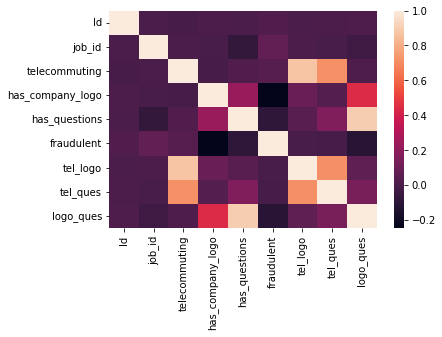

In [13]:
#discuss this monday 
import seaborn as sns
sns.heatmap(df.corr())
df.corr()


# basically compare correlations between all features and drop those with less correlations accordingly. basically for these 3 features, take either has_questions of has_company logo and drop the other 2

In [15]:
from pathlib import Path
df_train = pd.read_csv('../inclassfakejobs/train.csv')
df_test = pd.read_csv('../inclassfakejobs/test.csv')
drop_columns_test =  ['Id', 'job_id','title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits', 'employment_type','telecommuting','has_questions',
       'required_experience', 'required_education', 'industry', 'function','doughnuts_comsumption']
drop_columns_train =  ['Id', 'job_id','title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits', 'employment_type','telecommuting','has_questions','required_doughnuts_comsumption',
       'required_experience', 'required_education', 'industry', 'function']
df_train = df_train.drop(drop_columns_train, axis=1)
df_test = df_test.drop(drop_columns_test, axis=1)


df_train.to_csv('jun_train1.csv') 
df_test.to_csv('jun_test1.csv')

df_train

,has_company_logo,fraudulent
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
10723,1,0
10724,1,0
10725,1,0
10726,1,0
